In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
import pandas as pd
print(tf.__version__)

2.12.0


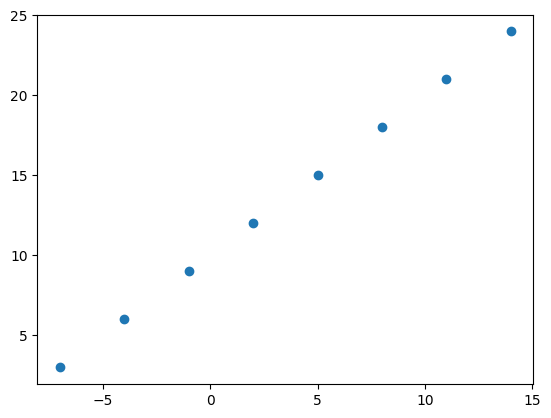

In [ ]:
#creating features
x = np.array([-7.0, -4.0, -1.0 , 2.0, 5.0 , 8.0, 11.0, 14.0])

# create label
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# visualize
plt.scatter(x,y)

In [ ]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [ ]:
x = tf.cast(tf.constant(x), dtype = tf.float32)
y = tf.cast(tf.constant(y), dtype = tf.float32)

In [ ]:
tf.random.set_seed(42)

#1 create the model

model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 1)
])

# 2 compile the model

model.compile(optimizer = tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.mae,
              metrics = ['mae'])

# 3 fit the model
model.fit(tf.expand_dims(x, axis = -1),y,epochs=100)


Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 15.3983 - mae: 15.3983
Epoch 2/100
1/1 [==============================] - 0s 21ms/step - loss: 15.1171 - mae: 15.1171
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 14.8831 - mae: 14.8831
Epoch 4/100
1/1 [==============================] - 0s 16ms/step - loss: 14.7506 - mae: 14.7506
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 14.6181 - mae: 14.6181
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 14.4856 - mae: 14.4856
Epoch 7/100
1/1 [==============================] - 0s 15ms/step - loss: 14.3531 - mae: 14.3531
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 14.2206 - mae: 14.2206
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 14.0881 - mae: 14.0881
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 13.9556 - mae: 13.9556
Epoch 11/100
1/1 [==============================] -

In [ ]:
#check x, y
x, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# predict on new value
y_pred = model.predict([17.0])
y_pred
# 0s 13ms/step - loss: 10.3123 - mae: 10.3123 this means that our actual answer is approximately 10.3 away from our answer

1/1 [==============================] - 0s 165ms/step


array([[29.809444]], dtype=float32)

# Improving our model

In [ ]:
# make the model
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 100, activation = None),
    tf.keras.layers.Dense(units = 1)
])
# compile the model
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 0.001),
              loss = tf.keras.losses.mae,
              metrics = ['mae'])
# fit the model
model2.fit(tf.expand_dims(x, axis = -1), y, epochs = 1000)



Epoch 1/1000
1/1 [==============================] - 0s 427ms/step - loss: 14.6302 - mae: 14.6302
Epoch 2/1000
1/1 [==============================] - 0s 10ms/step - loss: 14.5324 - mae: 14.5324
Epoch 3/1000
1/1 [==============================] - 0s 9ms/step - loss: 14.4347 - mae: 14.4347
Epoch 4/1000
1/1 [==============================] - 0s 8ms/step - loss: 14.3370 - mae: 14.3370
Epoch 5/1000
1/1 [==============================] - 0s 7ms/step - loss: 14.2393 - mae: 14.2393
Epoch 6/1000
1/1 [==============================] - 0s 7ms/step - loss: 14.1417 - mae: 14.1417
Epoch 7/1000
1/1 [==============================] - 0s 9ms/step - loss: 14.0442 - mae: 14.0442
Epoch 8/1000
1/1 [==============================] - 0s 6ms/step - loss: 13.9466 - mae: 13.9466
Epoch 9/1000
1/1 [==============================] - 0s 8ms/step - loss: 13.8491 - mae: 13.8491
Epoch 10/1000
1/1 [==============================] - 0s 9ms/step - loss: 13.7517 - mae: 13.7517
Epoch 11/1000
1/1 [===========================

In [ ]:
y_pred_2 = model2.predict([17.0])
y_pred_2

1/1 [==============================] - 0s 240ms/step


array([[27.09251]], dtype=float32)

In [ ]:
X= tf.range(-100, 100, 4)
X


<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
Y = X +10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

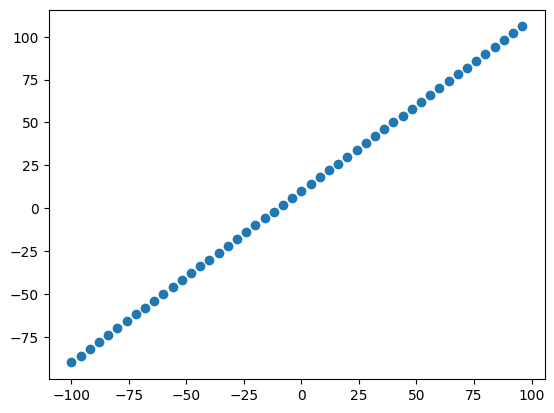

In [ ]:
plt.scatter(X, Y)

In [ ]:
# splitting the data in the training test and cross validation set
X_train = X[:40] # getting first 40 elements
Y_train = Y[:40] #80% of the data as the train data

X_test = X[40:] # getting the last 10 elements
Y_test = Y[40:]

X_train, Y_train, X_test, Y_test

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([60, 64, 68, 72, 76, 80, 84, 88, 92, 96], dtype=int32)>,
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [ ]:
len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

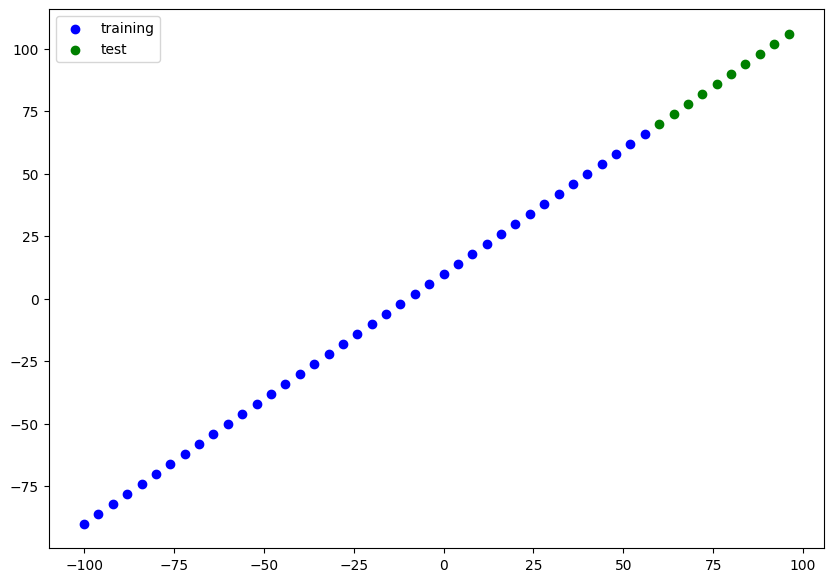

In [ ]:
# visulaizing the data
# defining the size of the
plt.figure(figsize = (10,7))

# ploting the training data
plt.scatter(X_train, Y_train, c = 'b', label = 'training')

# plotting the test data
plt.scatter(X_test, Y_test, c = 'g', label = 'test')

# displaying the legend
plt.legend();

In [ ]:
# creating the Neural network
model_train = tf.keras.Sequential([
     tf.keras.layers.Dense(units = 1)
 ])

# compiling the model
model_train.compile(loss= tf.keras.losses.mae,
                    optimizer = tf.keras.optimizers.SGD(),
                    metrics = ['mae'])

# fit the model
model_train.fit(tf.expand_dims(X_train, axis = -1), Y_train, epochs = 100)

Epoch 1/100
2/2 [==============================] - 0s 12ms/step - loss: 8.8160 - mae: 8.8160
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 9.4374 - mae: 9.4374
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 11.9512 - mae: 11.9512
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.1800 - mae: 9.1800
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 10.0313 - mae: 10.0313
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.3097 - mae: 9.3097
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.4690 - mae: 8.4690
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0316 - mae: 9.0316
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 18.5057 - mae: 18.5057
Epoch 10/100
2/2 [==============================] - 0s 5ms/step - loss: 9.9744 - mae: 9.9744
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - loss:

In [ ]:
model_train.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total parameters - total number of parameters in the model
* Trainabale parameters - these are the parameters that can be trained
* Non-trainable parameters - these are the parameters that cannot be trained

In [ ]:
# x = tf.constant([0, 1, 2])
# one_hot_1 = tf.one_hot(x, 4)
# one_hot_1

In [ ]:
# fit the modle
model_train.fit(tf.expand_dims(X_train, axis = -1), Y_train, epochs = 100, verbose = 1)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 7.9111 - mae: 7.9111
Epoch 2/100
2/2 [==============================] - 0s 14ms/step - loss: 8.2273 - mae: 8.2273
Epoch 3/100
2/2 [==============================] - 0s 7ms/step - loss: 6.9986 - mae: 6.9986
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 7.0647 - mae: 7.0647
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 9.9123 - mae: 9.9123
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0631 - mae: 9.0631
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 8.1348 - mae: 8.1348
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 8.1142 - mae: 8.1142
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 19.4724 - mae: 19.4724
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 9.5610 - mae: 9.5610
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - loss: 7.61

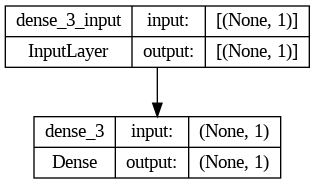

In [ ]:
plot_model(model = model_train, show_shapes= True)

Visualizing the prediction data

To visualise preiction it is a good idea to plot them against the ground truth labels.

Often you will see this in the form of 'y_test' v/s 'y_pred'

In [ ]:
# making prediction model
y_pred = model_train.predict(X_test)
y_pred

1/1 [==============================] - 0s 107ms/step


array([[ 69.31794 ],
       [ 73.76668 ],
       [ 78.215416],
       [ 82.664154],
       [ 87.11289 ],
       [ 91.56163 ],
       [ 96.01037 ],
       [100.45911 ],
       [104.907845],
       [109.356575]], dtype=float32)

In [ ]:
''' we want to visualise this plot so we made a custom function and we will reuse it again and again '''
def model_plot (training_data = X_train,
                train_label = Y_train,
                test_data = X_test,
                test_label = Y_test,
                prediction = y_pred):

  # plotting the training data
  plt.scatter(training_data, train_label, c = 'b', label = 'training')

  #plotting the test data
  plt.scatter(test_data, test_label, c = 'r', label = 'test')

  #plotting the prediction
  plt.scatter(test_data, prediction, c = 'g', label = 'prediction') # we passed test_data as when we defined y_pred we passed x_test as an input so we would like to compare the plot against it

  # plotting the legend
  plt.legend();

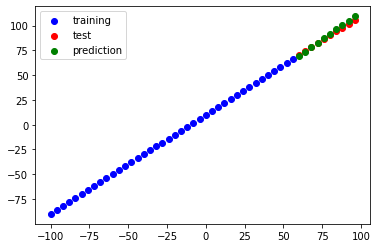

In [ ]:
model_plot(X_train, Y_train, X_test, Y_test, y_pred)

### Evaluating model with regression metrices

Depending on the problem we will select the model

For regression problem we use mainly these metrices
* MAE - mean absolute error
* MSE - mean squared error (we use it when large error have to be avoided for eg an error of 10 in MAE is fine But an error of 100 is unacceptable then we use MSE)
* Huber - It is a combination of MAE and MSE and is less sensitive to the outliers of MSE

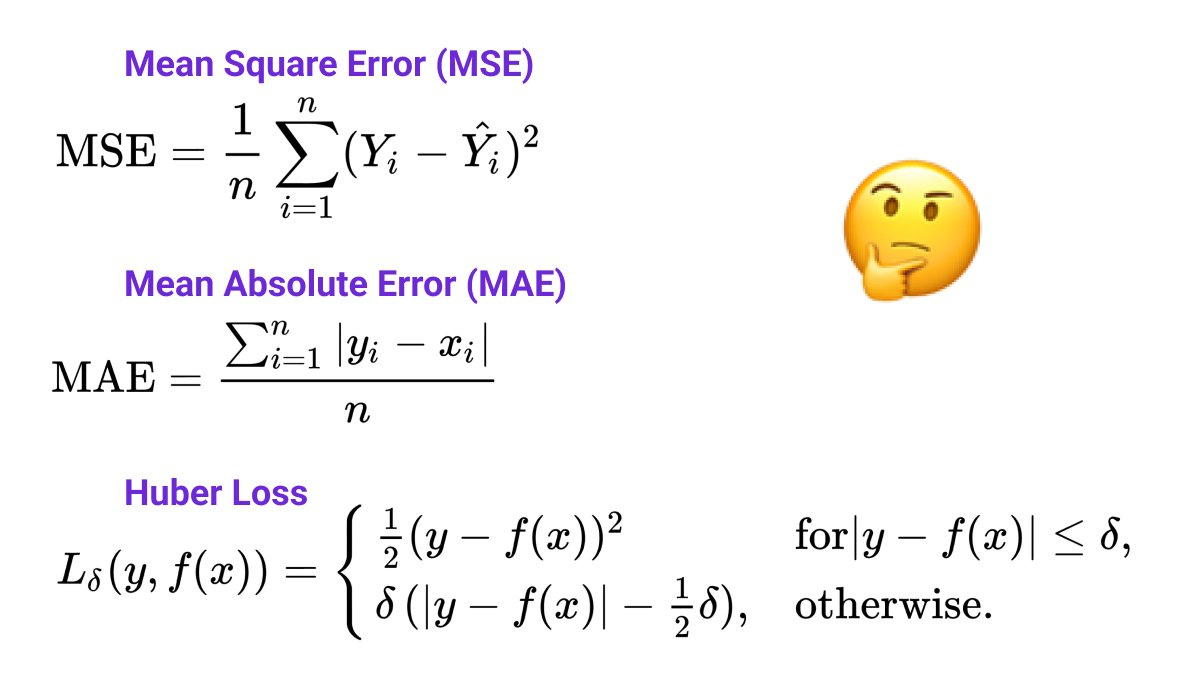

In [ ]:
# evaluate the model on the test set

model_train.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 212ms/step - loss: 1.5203 - mae: 1.5203


[1.5203368663787842, 1.5203368663787842]

If using the formula to calculate error remember we need the tensors of same dimesnion

## Running experiments to improve a model

After seeing the evaluation metrics and the predictions your model makes, it's likely you'll want to improve it.

Again, there are many different ways you can do this, but 3 of the main ones are:
1. **Get more data** - get more examples for your model to train on (more opportunities to learn patterns).
2. **Make your model larger (use a more complex model)** - this might come in the form of more layers or more hidden units in each layer.
3. **Train for longer** - give your model more of a chance to find the patterns in the data.

Since we created our dataset, we could easily make more data but this isn't always the case when you're working with real-world datasets.

So let's take a look at how we can improve our model using 2 and 3.

To do so, we'll build 3 models and compare their results:
1. `model_1` - same as original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs.
3. `model_3` - 2 layers, trained for 500 epochs.

**Build `model_1`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate original model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1075 - mae: 11.1075
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2990 - mae: 9.2990
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 6ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 6ms/step - l

1/1 [==============================] - 0s 100ms/step


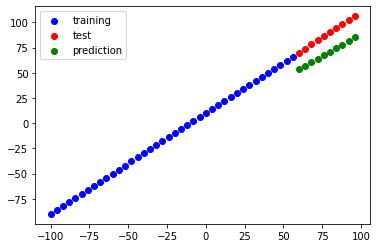

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
model_plot(prediction =y_preds_1)

In [ ]:
model_1.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 169ms/step - loss: 18.7453 - mae: 18.7453


[18.74532699584961, 18.74532699584961]

**Build `model_2`**


In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_1 and add an extra layer
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1) # add a second layer
])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=100, verbose=1) # set verbose to 0 for less output

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 4ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 5ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 27.8687 - mae: 27.8687
Epoch 11/100
2/2 [==============================] - 0s 4ms

1/1 [==============================] - 0s 189ms/step


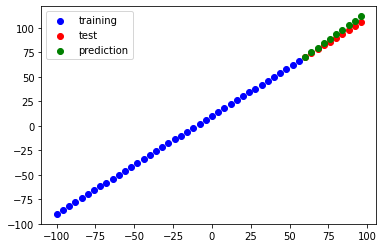

In [ ]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
model_plot(prediction=y_preds_2)

In [ ]:
model_2.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 187ms/step - loss: 3.1969 - mae: 3.1969


[3.1969382762908936, 3.1969382762908936]

**Build `model_3`**

For our 3rd model, we'll keep everything the same as `model_2` except this time we'll train for longer (500 epochs instead of 100).

This will give our model more of a chance to learn the patterns in the data.

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Replicate model_2
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(1),
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=['mae'])

# Fit the model (this time for 500 epochs, not 100)
model_3.fit(tf.expand_dims(X_train, axis=-1), Y_train, epochs=500, verbose=1) # set verbose to 0 for less output

Epoch 1/500
2/2 [==============================] - 1s 9ms/step - loss: 22.6625 - mae: 22.6625
Epoch 2/500
2/2 [==============================] - 0s 11ms/step - loss: 16.9439 - mae: 16.9439
Epoch 3/500
2/2 [==============================] - 0s 7ms/step - loss: 13.8059 - mae: 13.8059
Epoch 4/500
2/2 [==============================] - 0s 5ms/step - loss: 17.4504 - mae: 17.4504
Epoch 5/500
2/2 [==============================] - 0s 8ms/step - loss: 12.0637 - mae: 12.0637
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 9.8335 - mae: 9.8335
Epoch 7/500
2/2 [==============================] - 0s 5ms/step - loss: 10.7023 - mae: 10.7023
Epoch 8/500
2/2 [==============================] - 0s 4ms/step - loss: 10.8713 - mae: 10.8713
Epoch 9/500
2/2 [==============================] - 0s 7ms/step - loss: 38.0435 - mae: 38.0435
Epoch 10/500
2/2 [==============================] - 0s 4ms/step - loss: 25.6226 - mae: 25.6226
Epoch 11/500
2/2 [==============================] - 0s 6ms/s

1/1 [==============================] - 0s 70ms/step


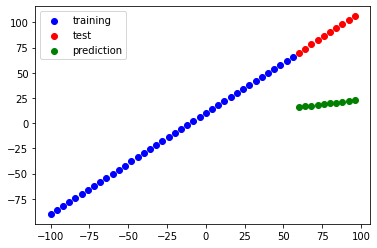

In [ ]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
model_plot(prediction=y_preds_3)

In [ ]:
model_3.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 153ms/step - loss: 68.6878 - mae: 68.6878


[68.6878433227539, 68.6878433227539]

## Comparing results

Now we've got results for 3 similar but slightly different results, let's compare them.

In [ ]:
model_results = [["model_1", model_1.evaluate(X_test, Y_test)],
                 ["model_2", model_2.evaluate(X_test, Y_test)],
                 ["model_3", model_3.evaluate(X_test, Y_test)]]

1/1 [==============================] - 0s 32ms/step - loss: 68.6878 - mae: 68.6878


In [ ]:
# we compare all our models using pandas Dataframe
all_results = pd.DataFrame(model_results, columns=["model", "pred"])
all_results

,model,pred
0,model_1,"[18.74532699584961, 18.74532699584961]"
1,model_2,"[3.1969382762908936, 3.1969382762908936]"
2,model_3,"[68.6878433227539, 68.6878433227539]"


Looks like the model 2 performed the best out of all three
--> It is not necessary that increasing the epoches at times this has opposite effects aswell

### Saving our Moudel
saving our model allows us to use our modelsoutside google colab (or wherever they are trained) such as web application or mobile app

There are two main format in which we can save our model

1) Savemodel format

2) HDf5 format

In [ ]:
# Save model using the SavedModel format
model_2.save("best_model_SavedModel_format")

In [ ]:
# saving a file in HDF5 Format
model_2.save("HDF5 format.h5")

In [ ]:
# loading a savedmodel format model
loaded_model = tf.keras.models.load_model("/content/HDF5 format.h5")
loaded_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Checking if model_2 == loaded_model
model_2_preds = model_2.predict(X_test)
loaded_prediction = loaded_model.predict(X_test)
model_2_preds == loaded_prediction

1/1 [==============================] - 0s 87ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# if they are not same then there is chances that their dimension is not same, not same shapemb

### Downloading a file from google colab



In [ ]:
from google.colab import files
files.download("/content/HDF5 format.h5")

# or we can simply click on the three dots and

### Regression Model

In [ ]:
# importing csv data using the help of pandas

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# how to one hot encode a pandas dataframe

#to change entire dataframe in one hot encoding
insurance_one_hot = pd.get_dummies(insurance)
# pd.get_dummies(data = 'sex', prefix = 'sex') # this only changes the sex colums

''' .head() this displayes only the top 5 rows'''
insurance_one_hot.head()


,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# creating labels and features to predict
Y = insurance_one_hot['charges']

# X the features will be everything except the charge column
X = insurance_one_hot.drop('charges', axis = 1)

'''axis : {0 or 'index', 1 or 'columns'}, default 0
    Whether to drop labels from the index (0 or 'index') or
columns (1 or 'columns').'''

"axis : {0 or 'index', 1 or 'columns'}, default 0\n    Whether to drop labels from the index (0 or 'index') or\ncolumns (1 or 'columns')."

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

We will be using the train_test_split of sklearn as this randomly splits the data and makes it convinient for us to split

In [ ]:
# Creating the data set as CV test and training
# we will only make training and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state= 42)

# random_stateint, RandomState instance or None, default=None
'''Controls the shuffling applied to the data before applying the split. Pass an int for reproducible output across multiple function calls. '''


#test_sizefloat or int, default=None
'''If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the
absolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.'''

'If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the \nabsolute number of test samples. If None, the value is set to the complement of the train size. If train_size is also None, it will be set to 0.25.'

In [ ]:
# build a neural network

'''In neural networks weights are initialized randomly. This happens using random number generator which will generate numbers randomly
every time you initialize the neural network.'''

tf.random.set_seed(42)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 10),
    tf.keras.layers.Dense(units = 1)
])

insurance_model.compile(loss = tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics = ['mae'])

insurance_model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8637.0996 - mae: 8637.0996
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 7886.7769 - mae: 7886.7769
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7558.1475 - mae: 7558.1475
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.0220 - mae: 7792.0220
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7748.3892 - mae: 7748.3892
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7589.9849 - mae: 7589.9849
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.5591 - mae: 7698.5591
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7496.7788 - mae: 7496.7788
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1743 - mae: 7493.1743

In [ ]:
insurance_model.evaluate(x_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [ ]:
#mae: 7023.3286 is telling our model is wrong by 7023.3286

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

In [ ]:
# improving our NN
tf.random.set_seed(42)

insurance_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 100), # if we have this layer this big our model become too complex so lets change the optimizer
    tf.keras.layers.Dense(units = 10),
    tf.keras.layers.Dense(units = 1)
])

insurance_model2.compile(loss = tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(),
                        metrics = ['mae'])

insurance_model2.fit(x_train, y_train, epochs = 100, verbose = 1)

Epoch 1/100
34/34 [==============================] - 1s 5ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7409.0811 - mae:

In [ ]:
insurance_model2.evaluate(x_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 4924.4956 - mae: 4924.4956


[4924.49560546875, 4924.49560546875]

In [ ]:
# further improving the model

tf.random.set_seed(42)

insurance_model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(units = 100),
    tf.keras.layers.Dense(units = 10),
    tf.keras.layers.Dense(units = 1)
])

insurance_model3.compile(loss = tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics = ["mae"])

history=insurance_model3.fit(x_train, y_train, epochs = 200)

Epoch 1/200
34/34 [==============================] - 1s 3ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12055.7510 - mae: 12055.7510
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7528.8408 - mae: 7528.8408
Epoch 9/200
34/34 [==============================] - 0s 3ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [ ]:
insurance_model3.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3488.7854 - mae: 3488.7856


[3488.785400390625, 3488.78564453125]

Text(0.5, 0, 'epochs')

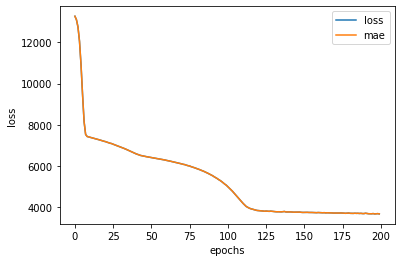

In [ ]:
# plot history (also called the loss curve or training curve)

pd.DataFrame(history.history).plot() #history has an attribute history
# here history is history=insurance_model3.fit(x_train, y_train, epochs = 200)
plt.ylabel("loss")
plt.xlabel("epochs")

In [ ]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


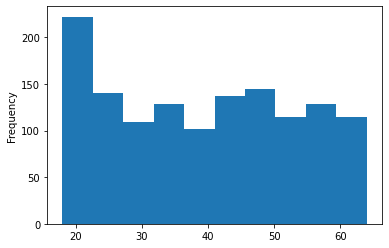

In [ ]:
X['age'].plot(kind = 'hist')

## to normalize the data we use sklearn library
HERE WE ARE PREPARING OUR DATA USING SKLEARN LIBRARY



Although Normalization is no mandate for all datasets available in machine learning, it is used whenever the attributes of the dataset have different ranges. It helps to enhance the performance and reliability of a machine learning model.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
# creating a column transformer
'''Applies transformers to columns of an array or pandas DataFrame.

This estimator allows different columns or column subsets of the input to be transformed separately
and the features generated by each transformer will be concatenated to form a single feature space.'''
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
    # (handle_unknown= 'ignore') this mainly means that if there is any column that onehotencoder doesnt know about just ignore these
)

# creating X and Y

X = insurance.drop("charges", axis = 1)
Y = insurance['charges']

# Splitting the dataset

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size = 0.2, random_state = 42)

# Fit the column transformer to our training data
'''whenever we have any sort of column transformer we want to fit it to the training data and then transform our test data'''
ct.fit(x_train)

# tarnsform training and test data with normalization with maxminscalera nd onehotencoder
X_train_normal = ct.transform(x_train)
X_test_normal = ct.transform(x_test)


In [ ]:
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


In [ ]:
X_train_normal

array([[0.7826087 , 0.49001137, 0.2       , ..., 0.        , 1.        ,
        0.        ],
       [0.13043478, 0.37956797, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.27156083, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.86956522, 0.27156083, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 1.        , 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.42504466, 0.        , ..., 0.        , 0.        ,
        1.        ]])